Data Source - 
https://www.nationwide.co.uk/about/house-price-index/download-data#xtab:uk-series

In [328]:
import pandas as pd
import numpy as np

df = pd.read_excel('monthly.xls')
df.head()

,Average House Price,INDEX Q1 1993=100,Seasonally Adjusted Index,Monthly % Change (SA),Year % Change,Latest 3 months on previous 3 months
1991-01-01,53051.721106,105.832511,107.127299,NaN,NaN,NaN
1991-02-01,53496.798746,106.720393,107.494996,0.003432,NaN,NaN
1991-03-01,52892.861606,105.515603,106.525649,-0.009018,NaN,NaN
1991-04-01,53677.435270,107.080744,107.126622,0.005642,NaN,NaN
1991-05-01,54385.726747,108.493710,107.266757,0.001308,NaN,NaN


In [329]:
df['ds'] = pd.to_datetime(df.index)
df['y'] = df['Average House Price']
df = df.reset_index()
df = df.drop(['Average House Price', 'INDEX Q1 1993=100', 'Seasonally Adjusted Index', 'Monthly % Change (SA)',
              'Year % Change', 'Latest 3 months on previous 3 months', 'index'], axis=1)
df.head()

,ds,y
0,1991-01-01,53051.721106
1,1991-02-01,53496.798746
2,1991-03-01,52892.861606
3,1991-04-01,53677.435270
4,1991-05-01,54385.726747


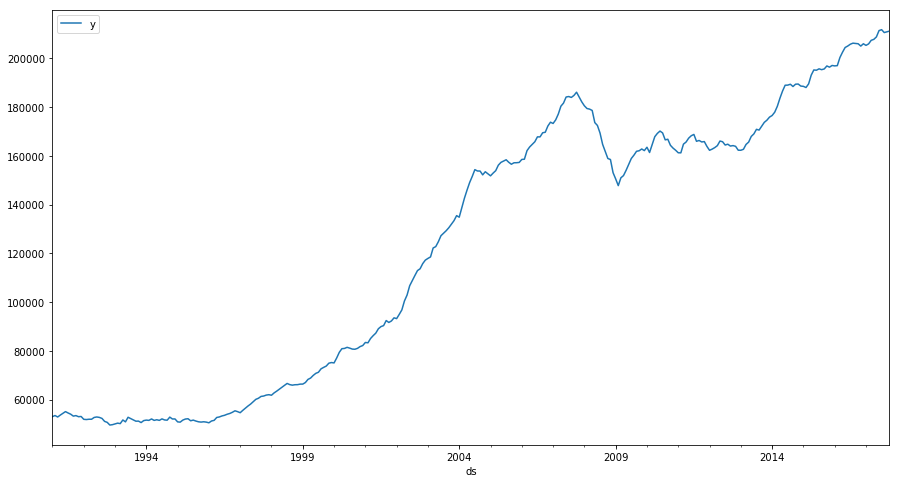

In [330]:
%matplotlib inline
df.set_index('ds').plot(figsize=(15,8))

In [331]:
df.y = np.log(df.y)
ts = df.copy()
ts_validate = df.copy()

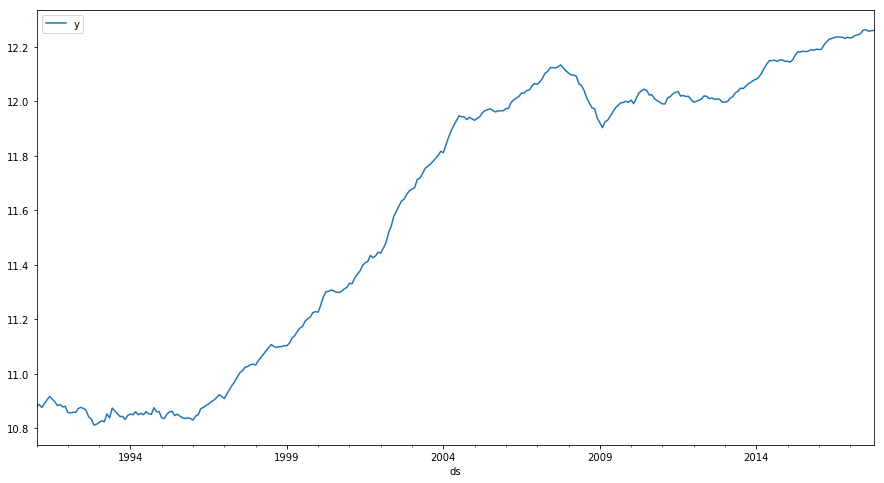

In [332]:
ts.set_index('ds').plot(figsize=(15,8))

In [333]:
ts_train = ts[(ts.ds < '2017-05-01') & (ts.ds > '2010-12-01')]

In [334]:
import datetime
import matplotlib.pyplot as plt
from fbprophet import Prophet

model = Prophet()
model.fit(ts_train)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [335]:
future = model.make_future_dataframe(periods=6, freq='MS')
forecast = model.predict(future)

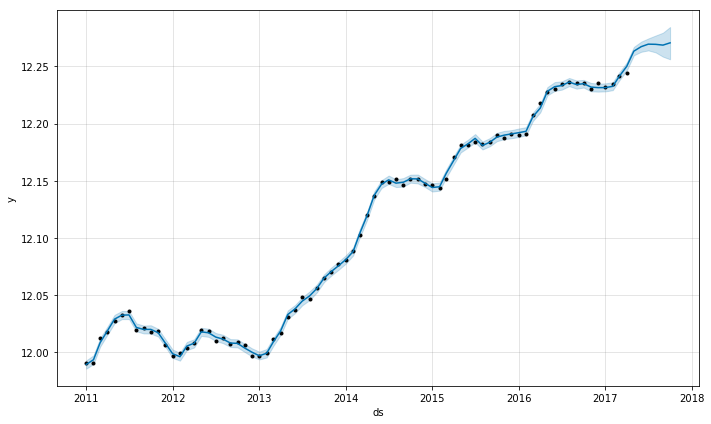

In [336]:
plot = model.plot(forecast)

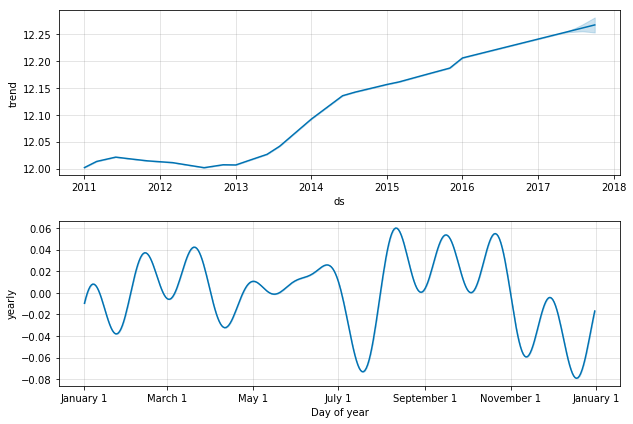

In [337]:
plot = model.plot_components(forecast)

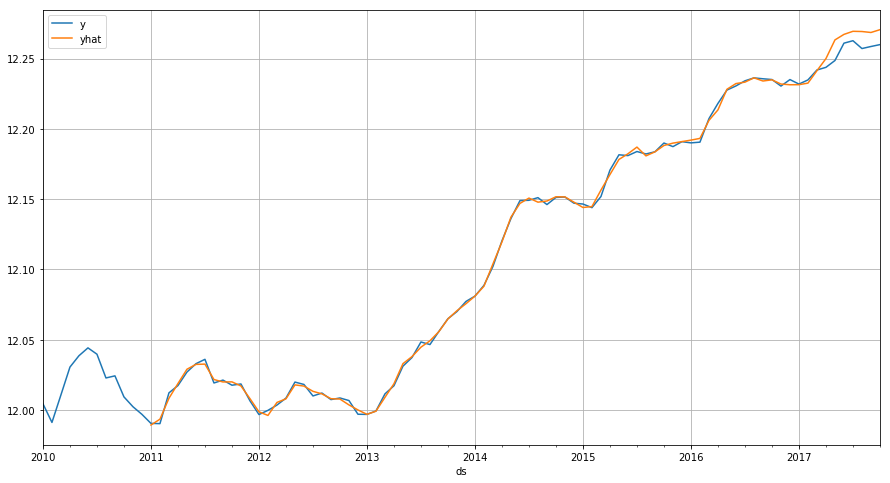

In [338]:
df_visualise = pd.merge(ts_validate, forecast, left_on='ds', right_on='ds', how='outer')
df_plot = df_visualise[df.ds > '2009-12-1']
df_plot = df_plot.set_index('ds')
df_plot[['y', 'yhat']].plot(figsize=(15,8), grid=True)